In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
data = pd.read_csv("C:/Users/ranas/Downloads/LoanApprovalPrediction.csv") 
warnings.filterwarnings("ignore")

In [2]:
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [5]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


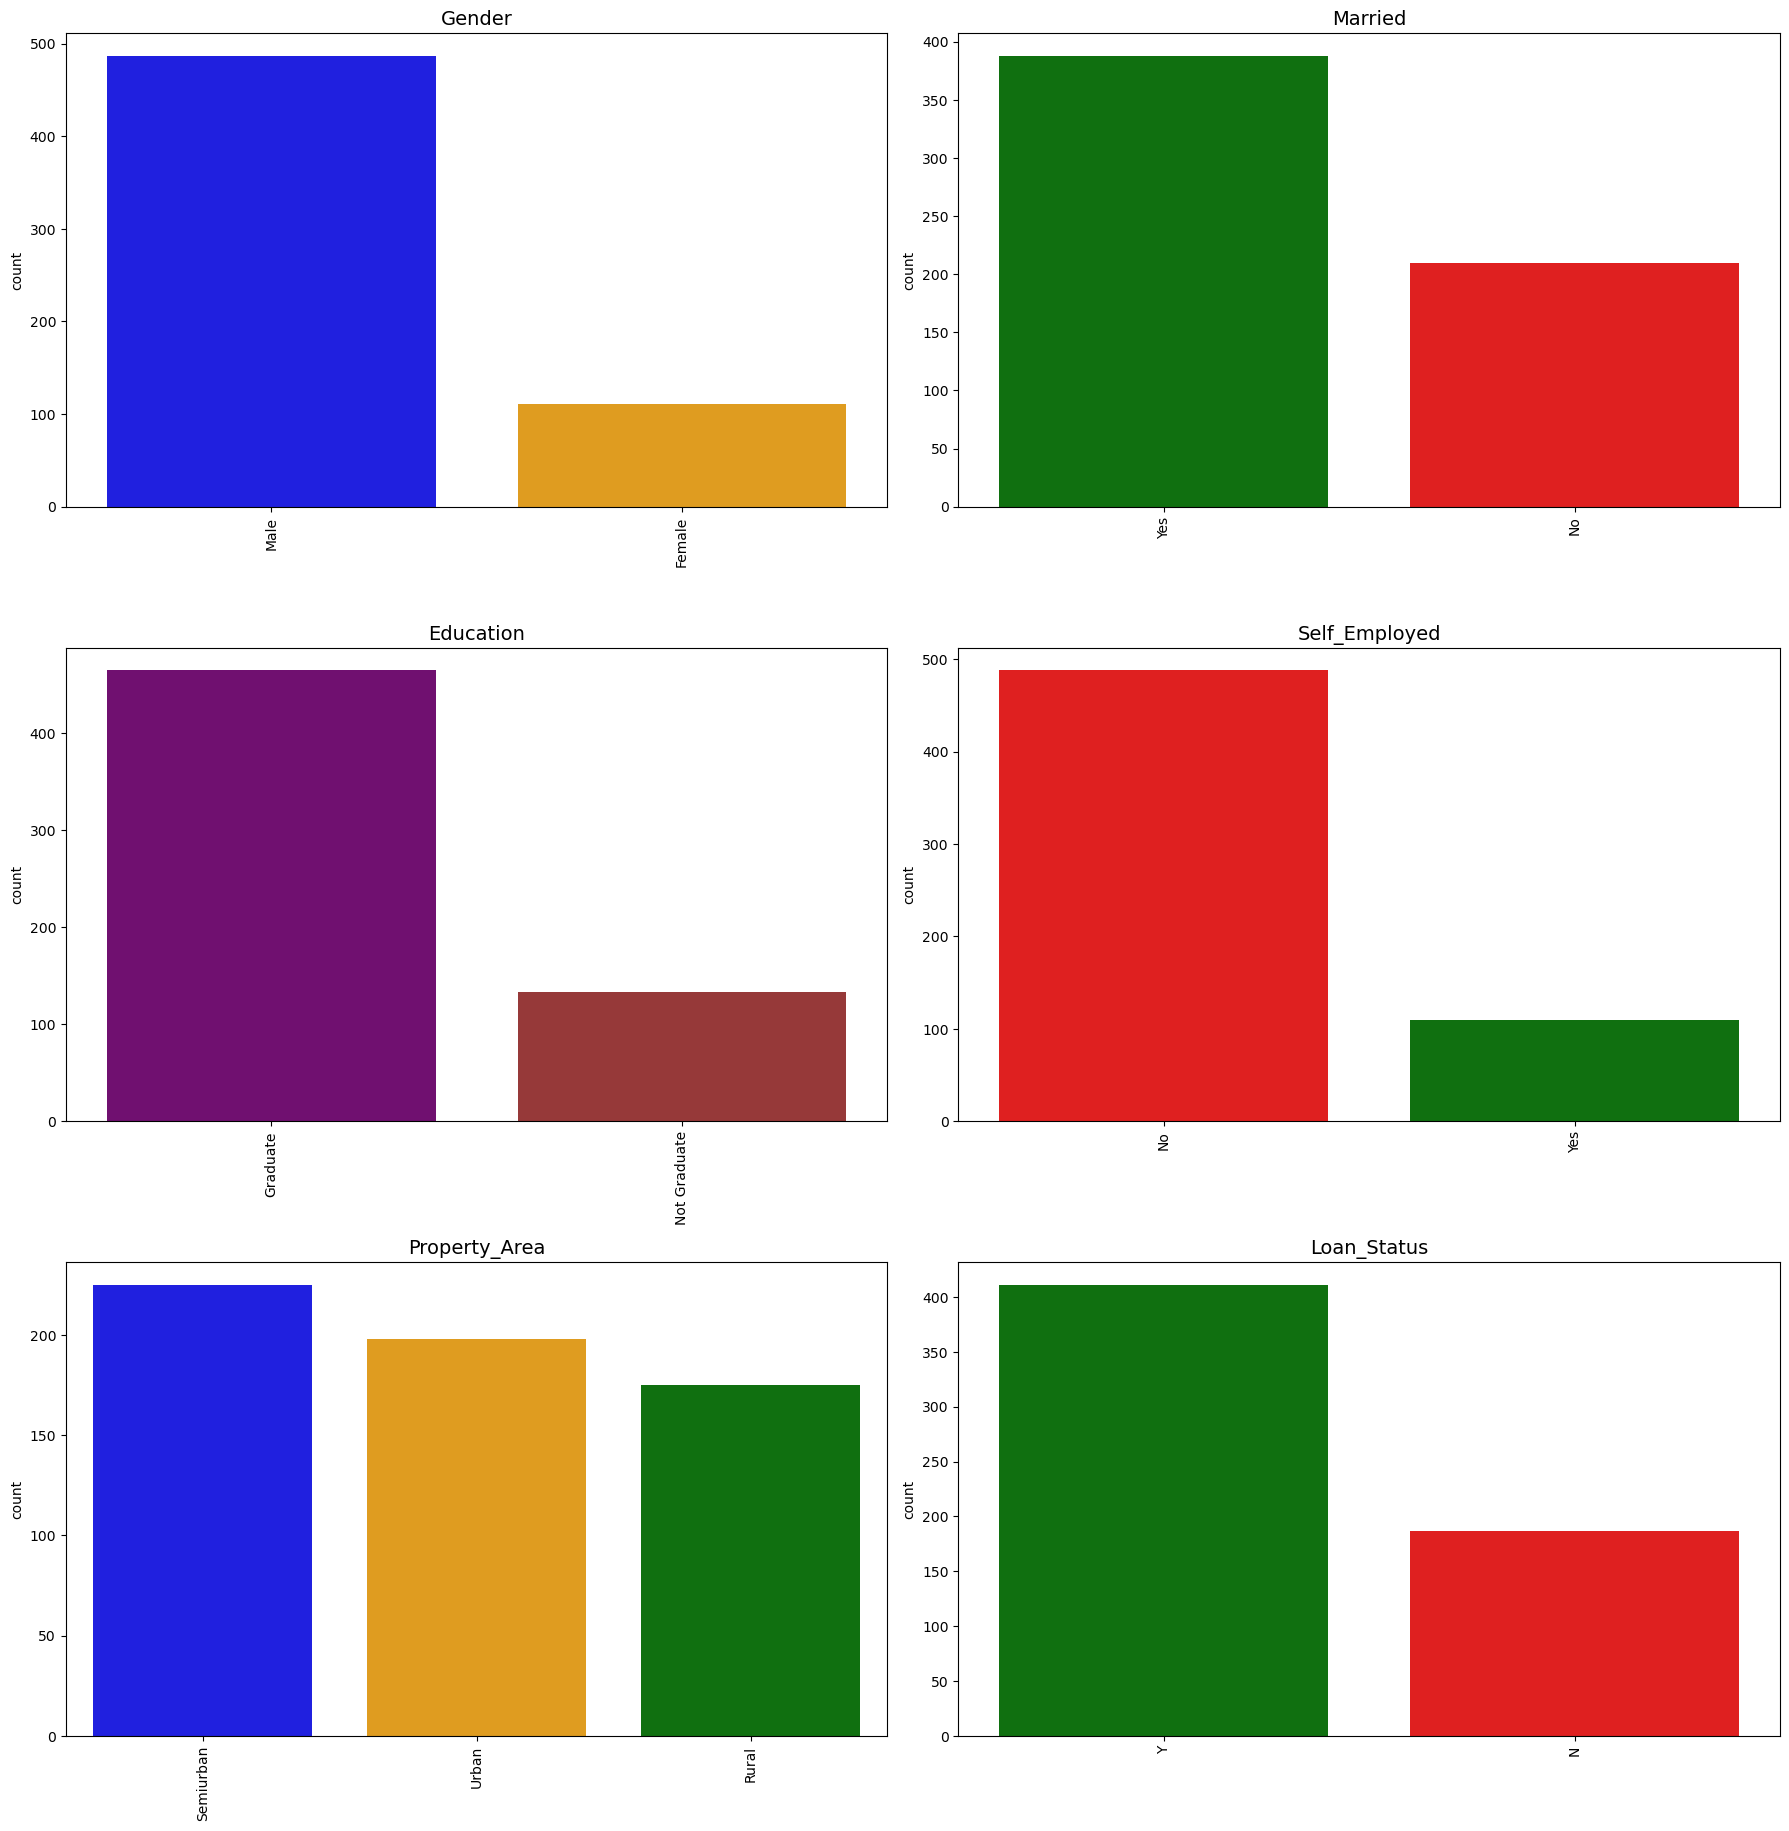

In [7]:
# Define a category-to-color mapping based on the dataset
category_colors = {
    'Male': 'blue',
    'Female': 'orange',
    'Yes': 'green',
    'No': 'red',
    'Graduate': 'purple',
    'Not Graduate': 'brown',
    'Rural': 'green',
    'Urban': 'orange',
    'Semiurban': 'blue',
    'Y': 'green',
    'N': 'red'
}

# Identify object-type columns
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index)

# Initialize the figure
plt.figure(figsize=(18, 36)) 
index = 1

# Loop through object-type columns to plot
for col in object_cols:
    y = data[col].value_counts()  # Value counts for the column
    
    # Assign colors based on the category-to-color mapping
    colors = [category_colors.get(cat, 'gray') for cat in y.index]  # Default to gray if not in mapping
    
    # Create subplot
    plt.subplot(6, 2, index)  # Adjusted layout for 6 rows, 2 columns
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y, palette=colors) 
    
    # Add title to each plot
    plt.title(col, fontsize=14)
    
    index += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

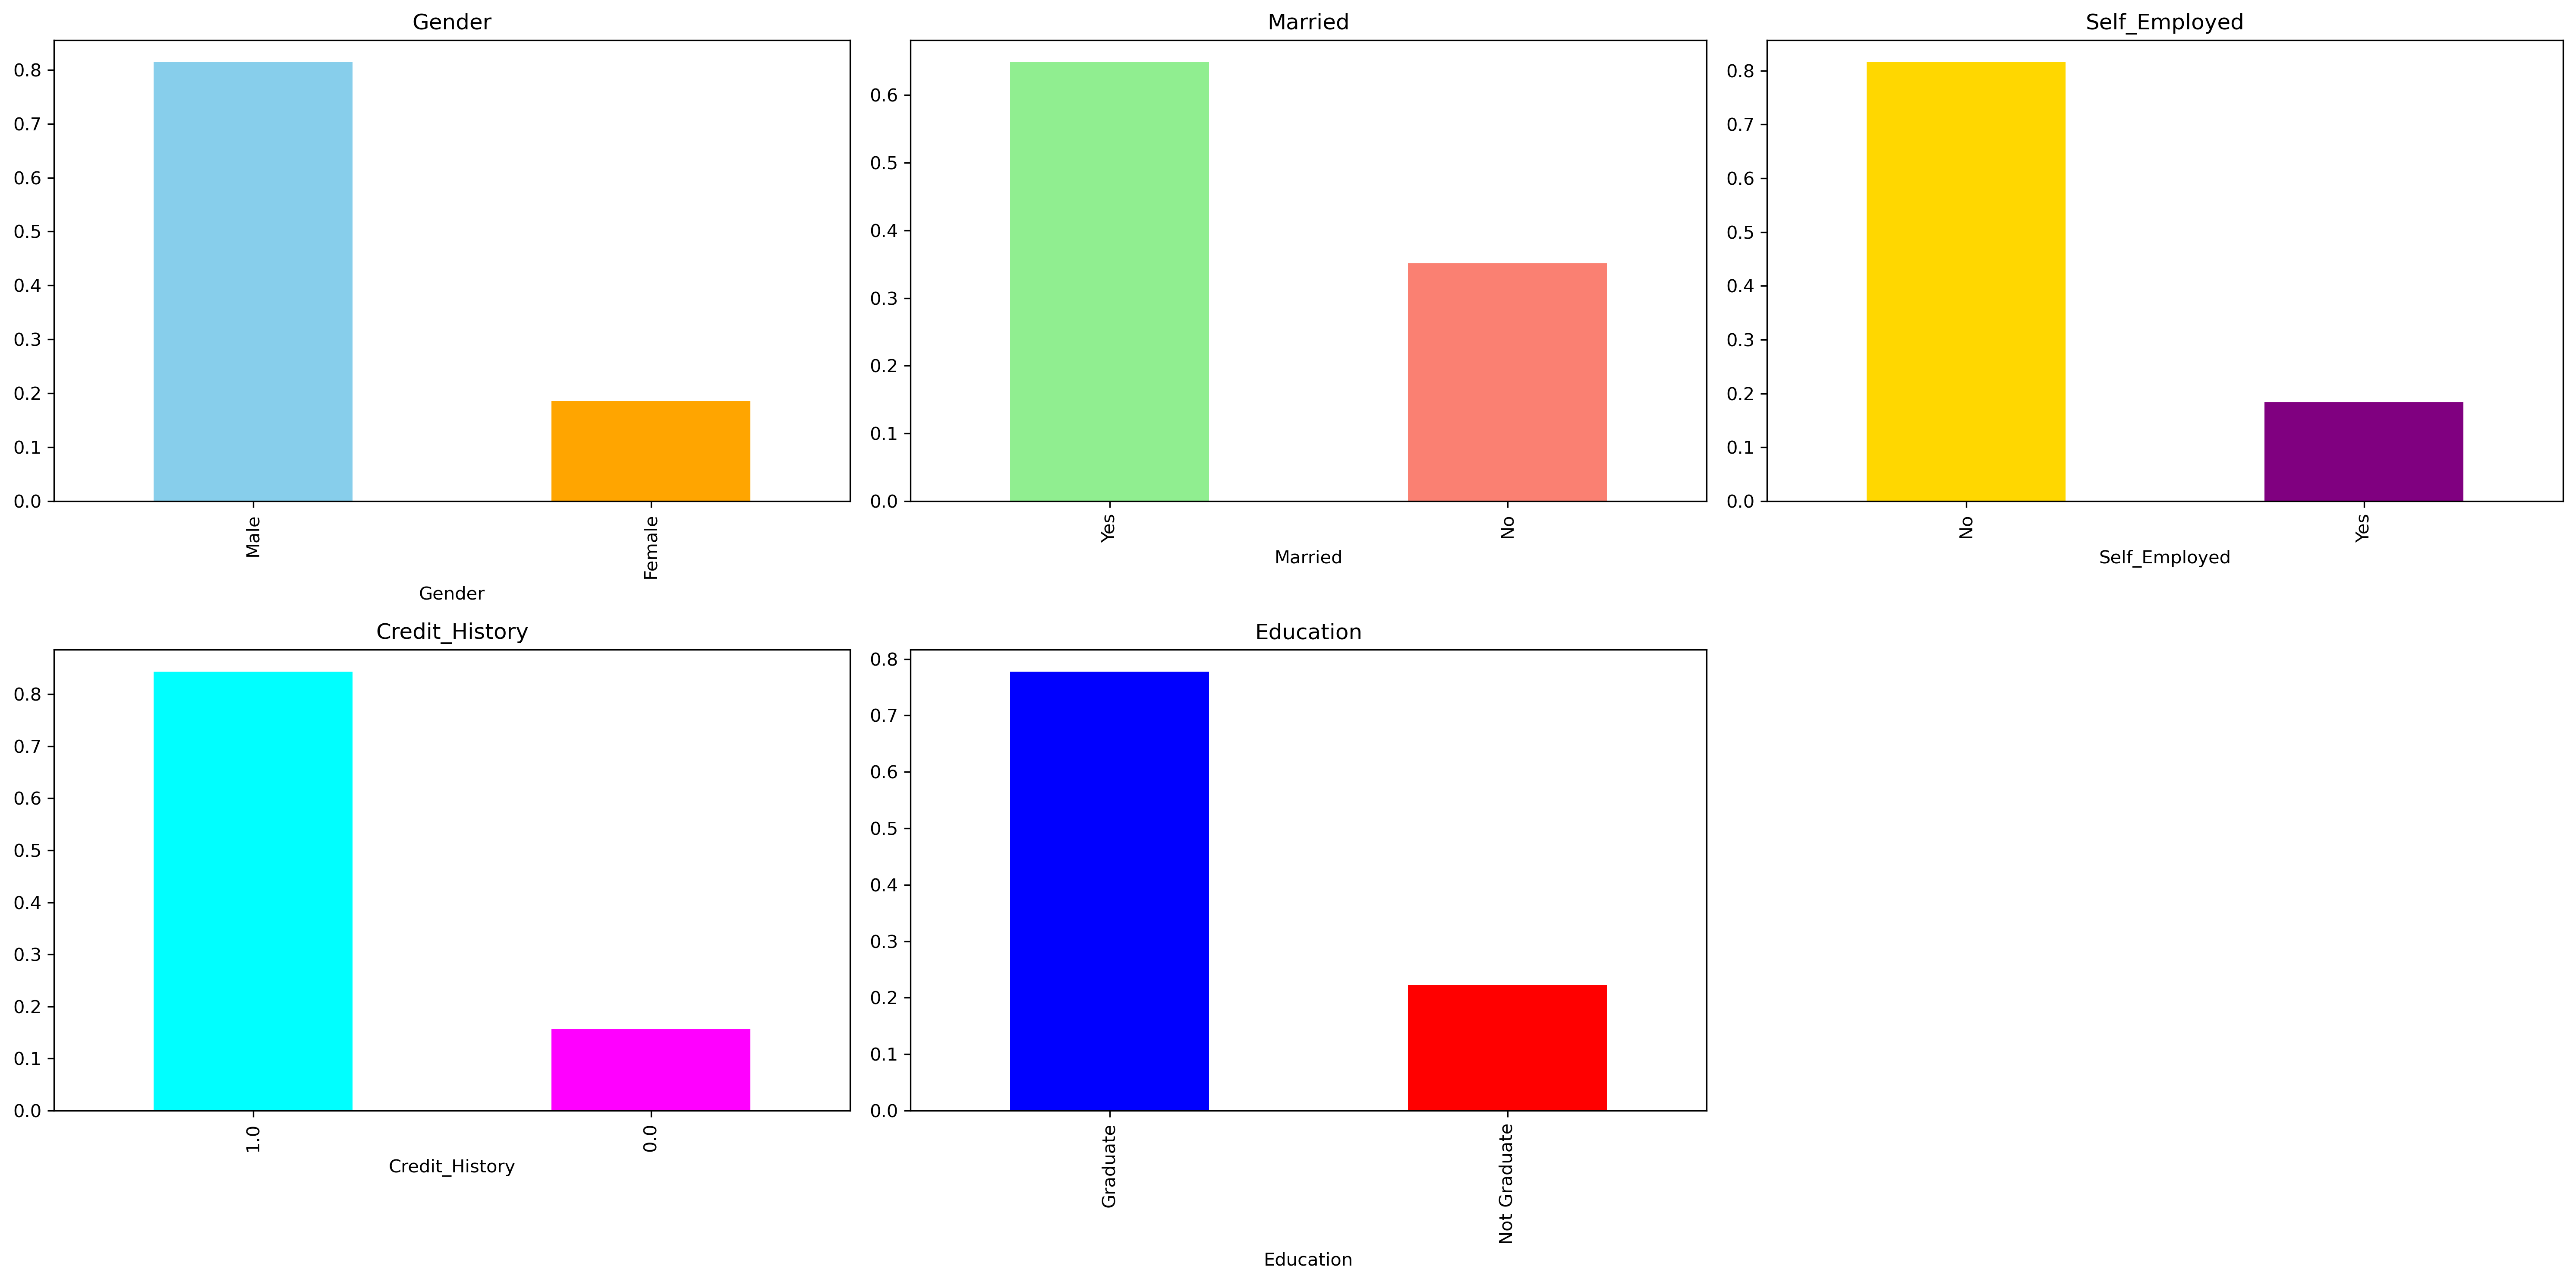

In [8]:
colors_gender = ['skyblue', 'orange']
colors_married = ['lightgreen', 'salmon']
colors_self_employed = ['gold', 'purple']
colors_credit_history = ['cyan', 'magenta']
colors_education = ['blue', 'red']

# Create the figure with better resolution
fig = plt.figure(figsize=(20, 10), dpi=300)

# Gender
plt.subplot(231)
data['Gender'].value_counts(normalize=True).plot.bar(
    color=colors_gender
)
plt.title('Gender')

# Married
plt.subplot(232)
data['Married'].value_counts(normalize=True).plot.bar(
    color=colors_married
)
plt.title('Married')

# Self Employed
plt.subplot(233)
data['Self_Employed'].value_counts(normalize=True).plot.bar(
    color=colors_self_employed
)
plt.title('Self_Employed')

# Credit History
plt.subplot(234)
data['Credit_History'].value_counts(normalize=True).plot.bar(
    color=colors_credit_history
)
plt.title('Credit_History')

# Education
plt.subplot(235)
data['Education'].value_counts(normalize=True).plot.bar(
    color=colors_education
)
plt.title('Education')

plt.tight_layout()

# Save the figure
fig.savefig('categorical_distribution.pdf', format='pdf', dpi=300)
fig.savefig('categorical_distribution.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

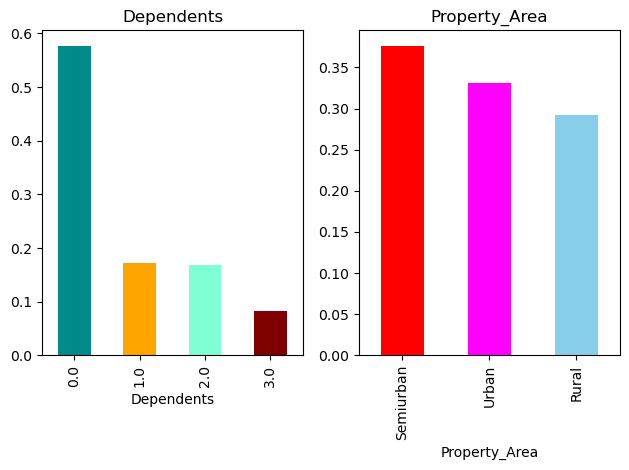

In [9]:
colors_Dependents=['darkcyan','orange','aquamarine','maroon']
colors_parea=['red','magenta','skyblue']
plt.figure(1)

plt.subplot(121)
data['Dependents'].value_counts(normalize=True).plot.bar(
    color=colors_Dependents,
    title='Dependents'
)
plt.subplot(122)
data['Property_Area'].value_counts(normalize=True).plot.bar(
    color=colors_parea,
    title='Property_Area'
)

plt.tight_layout()  # Adjust subplot spacing for clarity
plt.show()

Text(0.5, 0.98, '')

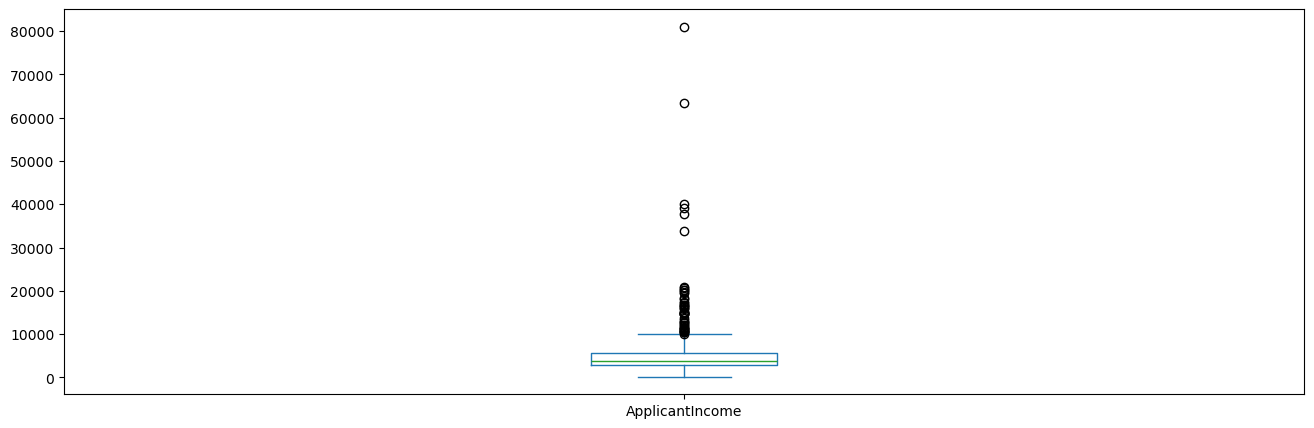

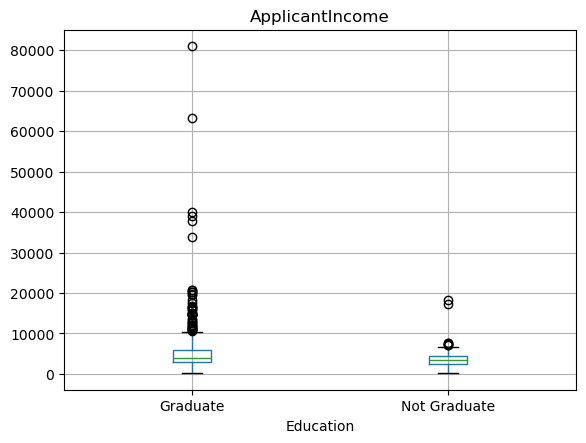

In [10]:
data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.subplot()
data.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

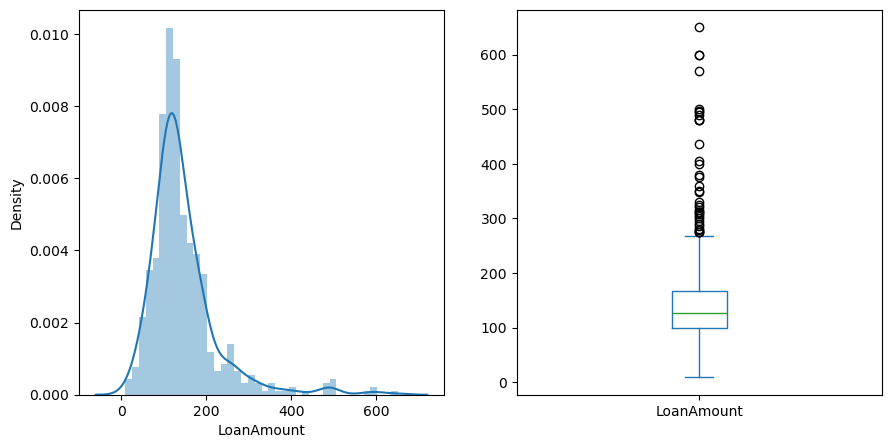

In [11]:
plt.subplot(131)
sns.distplot(data['LoanAmount'])
plt.subplot(132)
data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

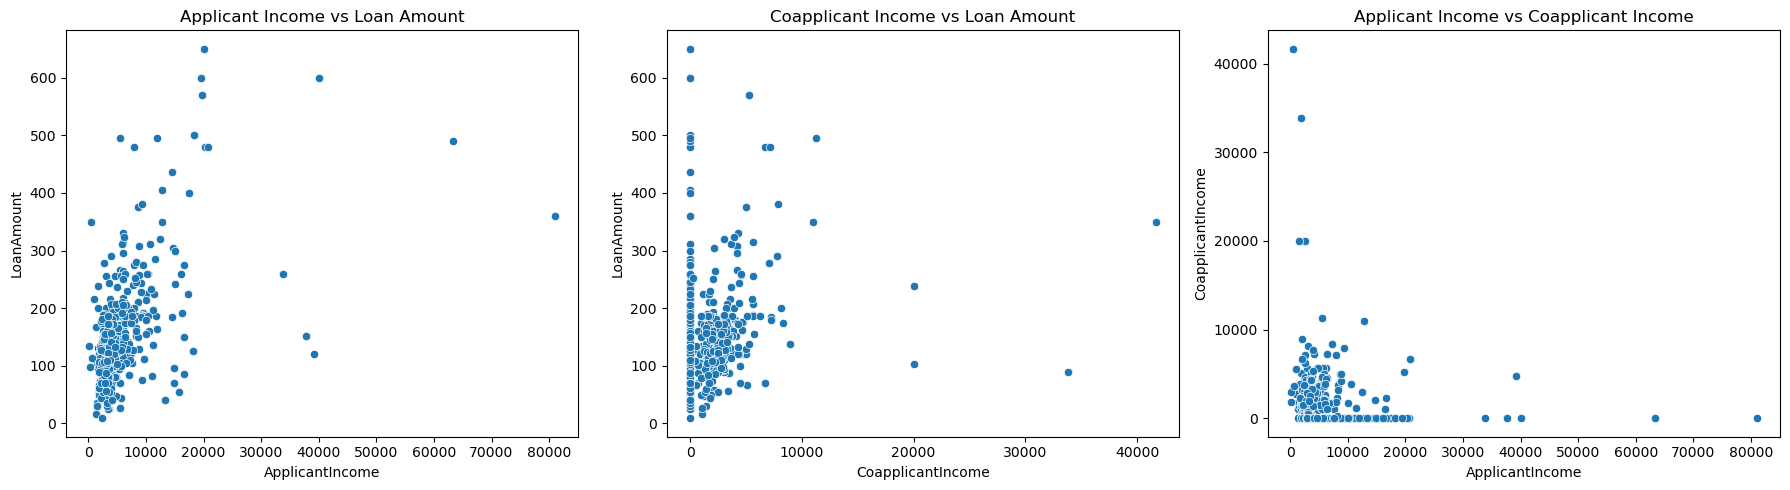

In [12]:
ig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatterplots
sns.scatterplot(data=data, x="ApplicantIncome", y="LoanAmount", ax=axes[0])
axes[0].set_title("Applicant Income vs Loan Amount")

sns.scatterplot(data=data, x="CoapplicantIncome", y="LoanAmount", ax=axes[1])
axes[1].set_title("Coapplicant Income vs Loan Amount")

sns.scatterplot(data=data, x="ApplicantIncome", y="CoapplicantIncome", ax=axes[2])
axes[2].set_title("Applicant Income vs Coapplicant Income")

plt.tight_layout()
plt.show()

In [13]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
print(data['Loan_Amount_Term'].value_counts())
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

Loan_Amount_Term
360.0    500
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


In [14]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [15]:
median_aincome = data['ApplicantIncome'].median()
data.loc[data['ApplicantIncome'] > 20000, 'ApplicantIncome'] = median_aincome

<Axes: >

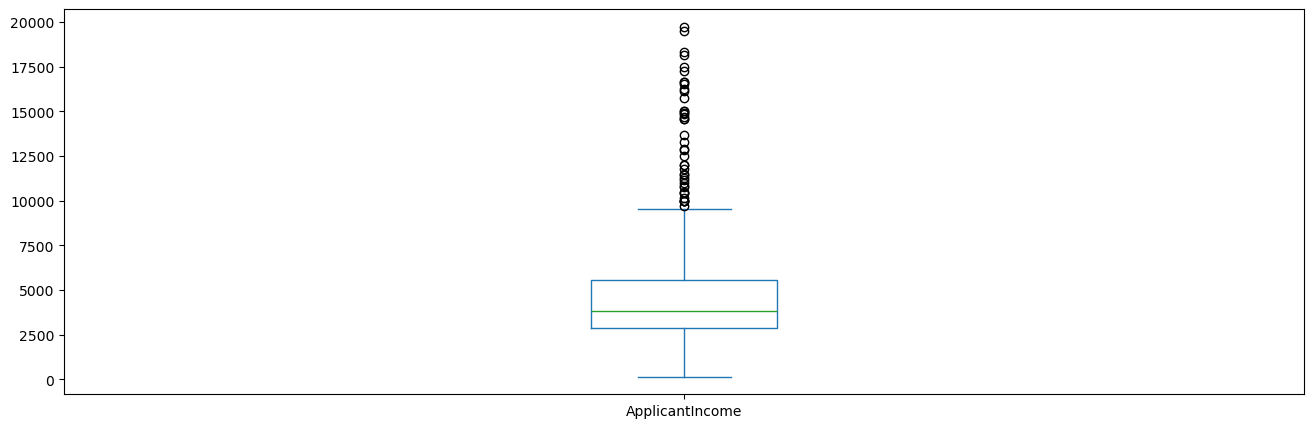

In [16]:
data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.subplot()

In [17]:
median_loanamt = data['LoanAmount'].median()
data.loc[data['LoanAmount'] > 500, 'LoanAmount'] = median_loanamt

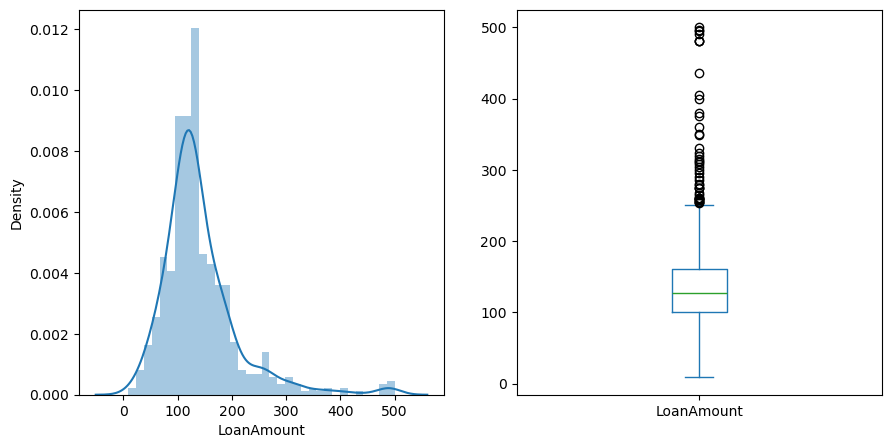

In [18]:
plt.subplot(131)
sns.distplot(data['LoanAmount'])
plt.subplot(132)
data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [19]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [21]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

In [22]:
data.head(12)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,127.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3.0,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2.0,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1.0,0,0,12841,10968.0,349.0,360.0,1.0,1,0


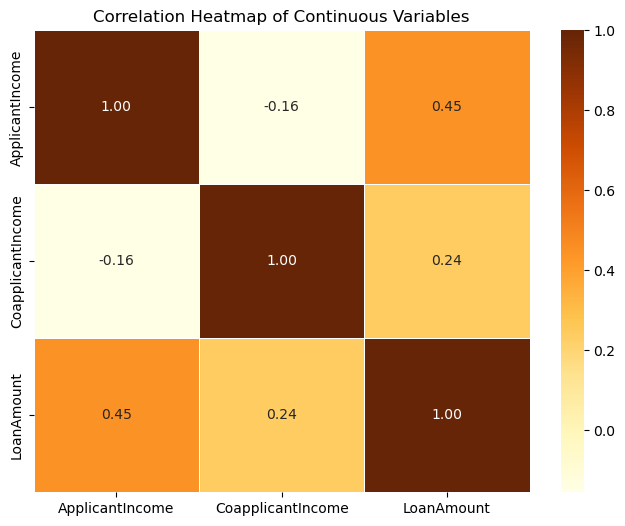

In [23]:
continuous_vars = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

# Compute the correlation matrix
corr_matrix = data[continuous_vars].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

In [24]:
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [round(variance_inflation_factor(df[features].values, i),3) for i in range(len(features))]
    return vif_data


In [25]:
vif_result = calculate_vif(data, continuous_vars)
print("Variance Inflation Factor (VIF) for Continuous Variables:")
print(vif_result)
vif_result.to_csv("C:/Users/ranas/Downloads/VIF_results.csv", index=False)

Variance Inflation Factor (VIF) for Continuous Variables:
             Feature    VIF
0    ApplicantIncome  4.059
1  CoapplicantIncome  1.497
2         LoanAmount  5.004


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
print(X.shape)
print(Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(598, 11)
(598,)


((418, 11), (180, 11), (418,), (180,))

In [28]:
m1 = LogisticRegression()
m1.fit(X_train, Y_train)
Y_pred=m1.predict(X_test)
a1=accuracy_score(Y_test,Y_pred)
print("Accuracy score for Logistic regession is :",100*round(a1,4))

Accuracy score for Logistic regession is : 79.44


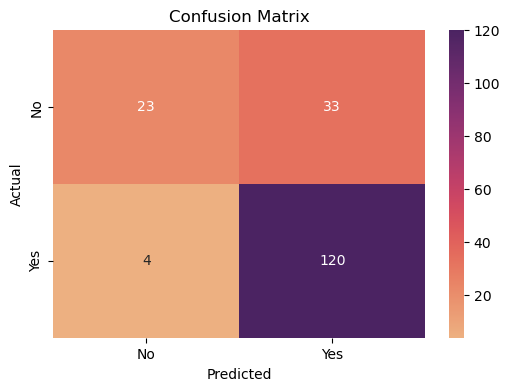

In [29]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

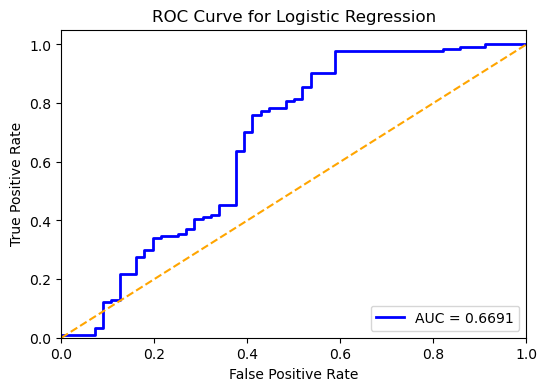

AUC-ROC Score: 0.6691


In [30]:
Y_pred_probs = m1.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(Y_test, Y_pred_probs)
roc_auc1 = auc(fpr,tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc1:.4f}')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc1:.4f}')

### The AUC (Area  Under the Curve) value is 0.6691, indicating the model has some predictive power but is not very strong. 

In [31]:
param_dist = {
    'n_neighbors': list(range(5,28,5)),  # Fixed values for n_neighbors
    'weights': ['distance'],
    'metric': ['euclidean','manhattan']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, Y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = best_knn.predict(X_test)
a2 = accuracy_score(Y_test, Y_pred)
print("Accuracy score for K-nearest neighbours classifier is:", 100*round(a2,4))

Best Parameters: {'weights': 'distance', 'n_neighbors': 25, 'metric': 'manhattan'}
Accuracy score for K-nearest neighbours classifier is: 69.44


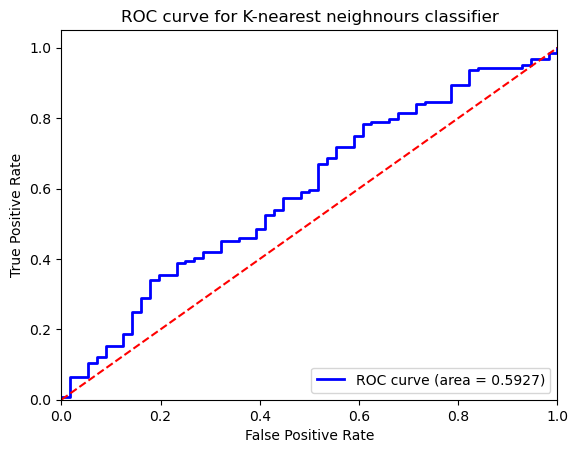

AUC-ROC Score: 0.5927


In [32]:
Y_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc2 = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for K-nearest neighnours classifier')
plt.legend(loc='lower right')
plt.show()
print(f'AUC-ROC Score: {roc_auc2:.4f}')

In [33]:
from sklearn.tree import DecisionTreeClassifier # import the DecisionTreeClassifier class from sklearn.tree module
m6 = DecisionTreeClassifier(random_state=42)
m6.fit(X_train, Y_train)
Y_pred=m6.predict(X_test)
a6=accuracy_score(Y_test,Y_pred)
print("Accuracy score for Decision Tree Classifier is :",100*round(a6,4))

Accuracy score for Decision Tree Classifier is : 76.11


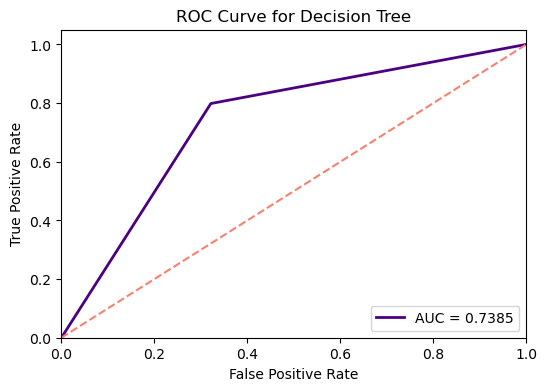

AUC-ROC Score: 0.7385


In [34]:
Y_pred_probs = m6.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(Y_test, Y_pred_probs)
roc_auc6 = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='indigo', lw=2, label=f'AUC = {roc_auc6:.4f}')
plt.plot([0, 1], [0, 1], color='salmon', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc6:.4f}')

In [35]:
from sklearn.naive_bayes import GaussianNB
m3 = GaussianNB()
m3.fit(X_train,Y_train)
Y_pred=m3.predict(X_test)
a3=accuracy_score(Y_test,Y_pred)
print("Accuracy score for Naive Bayes Classifier is :",100*round(a3,4))

Accuracy score for Naive Bayes Classifier is : 81.11


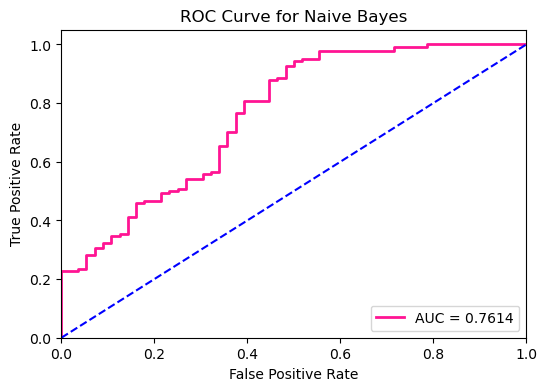

AUC-ROC Score: 0.7614


In [36]:
Y_pred_probs = m3.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(Y_test, Y_pred_probs)
roc_auc3 = auc(fpr, tpr)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'AUC = {roc_auc3:.4f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc3:.4f}')

In [37]:
m4 = RandomForestClassifier(random_state=42)
m4.fit(X_train,Y_train)
Y_pred=m4.predict(X_test)
a4=accuracy_score(Y_test,Y_pred)
print("Accuracy score for Random Forest Classifier is :",100*round(a4,4))

Accuracy score for Random Forest Classifier is : 76.67


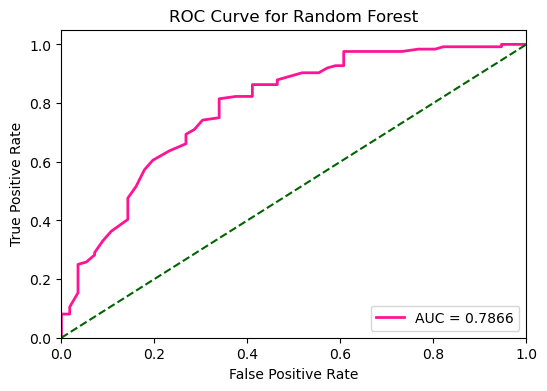

AUC-ROC Score: 0.7866


In [38]:
Y_pred_probs = m4.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(Y_test, Y_pred_probs)
roc_auc4 = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'AUC = {roc_auc4:.4f}')
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc4:.4f}')

In [39]:
m5=SVC(probability=True)
m5.fit(X_train,Y_train)
Y_pred=m5.predict(X_test)
a5=accuracy_score(Y_test,Y_pred)
print("Accuracy score for Support Vector Classifier is :",100*round(a5,4))

Accuracy score for Support Vector Classifier is : 68.89


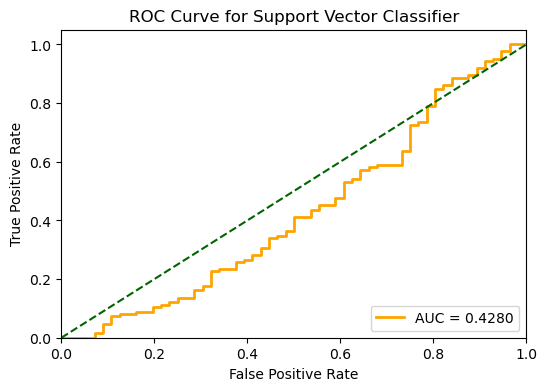

AUC-ROC Score: 0.4280


In [40]:
Y_pred_probs = m5.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(Y_test, Y_pred_probs)
roc_auc5 = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {roc_auc5:.4f}')
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Classifier')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc5:.4f}')

In [41]:
methods = ["Logistic Regression", "K-Nearest Neighbor Classifier","Decision Tree","Random Forest Classifier","Support Vector Classifier",
           "Naive Bayes Classifier"]
accuracies = [100*round(a1, 4), 100*round(a2, 4),100*round(a6,4),100*round(a4,4),100*round(a5,4),100*round(a3,4)]
auc_roc_scores=[round(roc_auc1, 4), round(roc_auc2, 4), round(roc_auc6, 4), round(roc_auc4, 4), round(roc_auc5, 4),round(roc_auc3, 4)]
results_df = pd.DataFrame({
    "Method": methods,
    "Accuracy Score (%)": accuracies,
    "AUC-ROC Score": auc_roc_scores
})
results_df.to_csv("C:/Users/ranas/Downloads/model_results.csv", index=False)

In [42]:
results_df

,Method,Accuracy Score (%),AUC-ROC Score
0,Logistic Regression,79.44,0.6691
1,K-Nearest Neighbor Classifier,69.44,0.5927
2,Decision Tree,76.11,0.7385
3,Random Forest Classifier,76.67,0.7866
4,Support Vector Classifier,68.89,0.4280
5,Naive Bayes Classifier,81.11,0.7614


In [43]:
results_df_arrange = results_df.sort_values(by=["Accuracy Score (%)"], ascending=[False])
results_df_arrange

,Method,Accuracy Score (%),AUC-ROC Score
5,Naive Bayes Classifier,81.11,0.7614
0,Logistic Regression,79.44,0.6691
3,Random Forest Classifier,76.67,0.7866
2,Decision Tree,76.11,0.7385
1,K-Nearest Neighbor Classifier,69.44,0.5927
4,Support Vector Classifier,68.89,0.4280


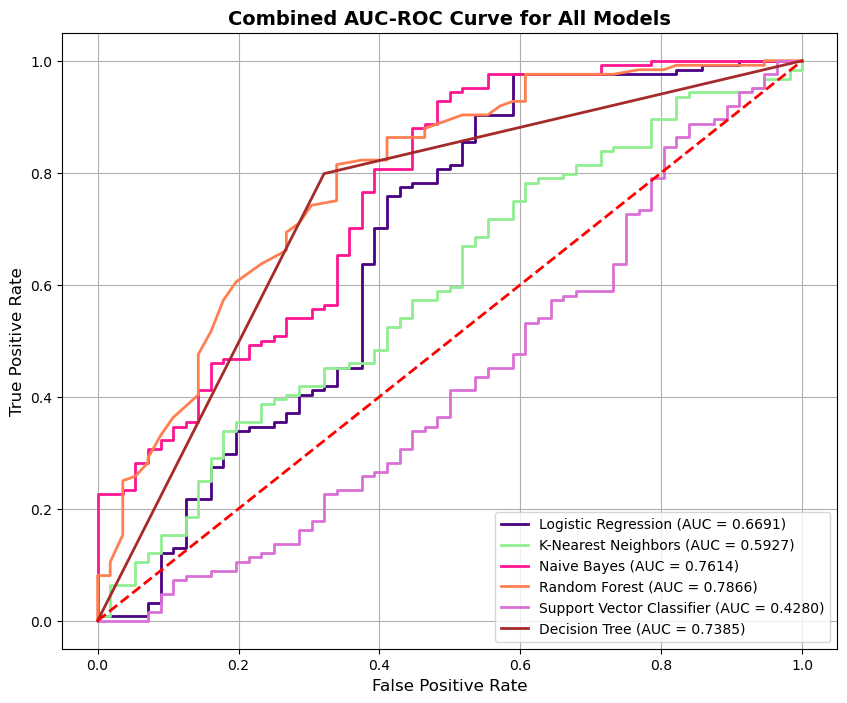

In [44]:
fpr1, tpr1, _ = roc_curve(Y_test, m1.predict_proba(X_test)[:, 1])
roc_auc1 = auc(fpr1, tpr1)

# K-Nearest Neighbors
fpr2, tpr2, _ = roc_curve(Y_test, best_knn.predict_proba(X_test)[:, 1])
roc_auc2 = auc(fpr2, tpr2)

# Naive Bayes
fpr3, tpr3, _ = roc_curve(Y_test, m3.predict_proba(X_test)[:, 1])
roc_auc3 = auc(fpr3, tpr3)

# Random Forest
fpr4, tpr4, _ = roc_curve(Y_test, m4.predict_proba(X_test)[:, 1])
roc_auc4 = auc(fpr4, tpr4)

# Support Vector Classifier (if using probability estimates, otherwise use decision_function)
fpr5, tpr5, _ = roc_curve(Y_test, m5.predict_proba(X_test)[:, 1])
roc_auc5 = auc(fpr5, tpr5)

# Decision Tree
fpr6, tpr6, _ = roc_curve(Y_test, m6.predict_proba(X_test)[:, 1])
roc_auc6 = auc(fpr6, tpr6)

# Plotting all ROC curves together
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {roc_auc1:.4f})', color='indigo', linewidth=2)
plt.plot(fpr2, tpr2, label=f'K-Nearest Neighbors (AUC = {roc_auc2:.4f})', color='lightgreen', linewidth=2)
plt.plot(fpr3, tpr3, label=f'Naive Bayes (AUC = {roc_auc3:.4f})', color='deeppink', linewidth=2)
plt.plot(fpr4, tpr4, label=f'Random Forest (AUC = {roc_auc4:.4f})', color='coral', linewidth=2)
plt.plot(fpr5, tpr5, label=f'Support Vector Classifier (AUC = {roc_auc5:.4f})', color='orchid', linewidth=2)
plt.plot(fpr6, tpr6, label=f'Decision Tree (AUC = {roc_auc6:.4f})', color='brown', linewidth=2)

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)

# Formatting the plot
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Combined AUC-ROC Curve for All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.savefig("C:/Users/ranas/Downloads/roc_curves.pdf")
plt.show()